<a href="https://colab.research.google.com/github/williammcintosh/CS510_DataEngineering_Assignments/blob/main/04_validation/CS510_Week_4_Data_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

## Will McIntosh

[Data Dictionary Link](https://www.oregon.gov/ODOT/Data/documents/CDS_Code_Manual.pdf)

In [1]:
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
from tqdm.auto import tqdm # For progress bar

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

file_path = "/content/Hwy26Crashes2019_S23.csv"
!gdown 1A_R4rDgJsII7wL-onaPeodvv07rPk1SX

df = pd.read_csv(file_path, low_memory=False)
df.head(10)

Downloading...
From: https://drive.google.com/uc?id=1A_R4rDgJsII7wL-onaPeodvv07rPk1SX
To: /content/Hwy26Crashes2019_S23.csv
100% 596k/596k [00:00<00:00, 84.1MB/s]


,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Highway Suffix,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Nearest Intersecting Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,Milepoint,Posted Speed Limit,Road Character,Off Roadway Flag,Intersection Type,Intersection Related Flag,Roundabout Flag,Driveway Related Flag,Number of Lanes,Number of Turning Legs,Median Type,Impact Location,Crash Type,Collision Type,Crash Severity,Weather Condition,Road Surface Condition,Light Condition,Traffic Control Device (TCD),TCD Functional Flag,Investigating Agency,Crash Level Event 1 Code,Crash Level Event 2 Code,Crash Level Event 3 Code,Crash Level Cause 1 Code,Crash Level Cause 2 Code,Crash Level Cause 3 Code,School Zone Indicator,Work Zone Indicator,Secondary Crash Indicator,Alcohol-Involved Flag,Drugs Involved Flag,Crash Marijuana Involved Flag,Speed Involved Flag,Crash Level Hit & Run Flag,Population Range Code,Road Control,Route Type,Route Number,Region ID,District ID,Segment Marker ID,Segment Point LRS Measure,Unlocatable Flag,Total Vehicle Count,Total Fatality Count,Total Suspected Serious Injury (A) Count,Total Suspected Minor Injury (B) Count,Total Possible Injury (C) Count,Total Non-Fatal Injury Count,Total Un-Injured Children Age 00-04,Total Un-Injured Persons,Total Pedestrian Count,Total Pedestrian Fatality Count,Total Pedestrian Non-Fatal Injury Count,Total Pedalcyclist Count,Total Pedalcyclist Fatality Count,Total Pedalcyclist Non-Fatal Injury Count,Total Unknown Non-Motorist Count,Total Unknown Non-Motorist Fatality Count,Total Unknown Non-Motorist Injury Count,Total Vehicle Occupant Count,Total Count of Persons Involved,Total Persons Using Safety Equipment,Total Persons Not Using Safety Equipment,Total Persons Safety Equipment Use Unknown,Vehicle Ownership Code,Vehicle Special Use Code,Vehicle Type Code,Emergency Use Flag,Number of Trailers,Vehicle Movement Code,Vehicle Travel Direction From,Vehicle Travel Direction To,Vehicle Action Code,Vehicle Cause 1 Code,Vehicle Cause 2 Code,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence Status,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 1 Code,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
0,1809119,1,NaN,NaN,NaN,NaN,NaN,99992.0,3.0,14.0,2019.0,5.0,14.0,26.0,0.0,57.0,14.0,1.0,26.0,NaN,1.0,0.0,0.0,NaN,002600100S00,45.0,27.0,40.62,-122.0,22.0,59.23,0.0,NaN,NaN,NaN,NaN,NaN,9.0,16.77,55.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,NaN,2.0,B,6,2.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,8.0,US,26.0,1.0,02C,293_10835,NaN,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [2]:
df.shape

(2739, 157)

In [40]:
df.head().to_csv()

',Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Highway Suffix,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Nearest Intersecting Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,Milepoint,Posted Speed Limit,Road Character,Off Roadway Flag,Intersection Type,Intersection Related Flag,Roundabout Flag,Driveway Related Flag,Number of Lanes,Number of Turning Legs,Median Type,Impact Location,Crash Type,Collision Type,Crash Severity,Weather Condition,Road Surface C

## Helper Functions

In [3]:
def missing_data(df):
    """
    Takes an existing dataframe as input and returns a new dataframe with the percentage and count of missing values for each column.
    """
    missing_count = df.isna().sum()  # Get the count of missing values for each column
    missing_pct = round(missing_count / len(df) * 100, 2)  # Calculate the percentage of missing values for each column
    missing_df = pd.concat([missing_count, missing_pct], axis=1, keys=['missing_count', 'missing_pct'])  # Combine the count and percentage into a new dataframe
    missing_df = missing_df[missing_df['missing_count'] > 0]  # Only include columns with missing values
    missing_df.index.name = 'column'  # Set the index name to 'column'
    missing_df = missing_df.sort_values(by='missing_pct', ascending=True)  # Sort by the percentage of missing values in descending order
    return missing_df

In [4]:
missing_data(df)

,missing_count,missing_pct
column,,
Vehicle ID,508,18.55
Vehicle Coded Seq#,532,19.42
Vehicle Occupant Count,1523,55.60
Vehicle Striking Flag,1523,55.60
Participant Type Code,1523,55.60
Sex,1523,55.60
Safety Equipment Use Unknown Quantity,1523,55.60
Non-Motorist Movement Code,1523,55.60
Safety Equipment Un-used Quantity,1523,55.60


# Assertions

## Existence Assertions


### 1) Existence of Crash Date for Each Record

Ensure every crash record has a valid crash date.

In [119]:
grouped = df.groupby('Crash ID')
date_info_complete = grouped[['Crash Year', 'Crash Month', 'Crash Day']].apply(lambda x: x.notna().any(axis=1).any()).all()

if not date_info_complete:
    print("Warning: Some crash records are missing date information.")
else:
    print("All crash records contain appropriate date information.")

All crash records contain appropriate date information.


### 2) Existence of Crash ID in All Records

Verify that every record has a Crash ID.


In [118]:
if not df['Crash ID'].notna().all():
    print("Warning: Some records are missing a Crash ID.")
else:
    print("All records contain a Crash ID")

All records contain a Crash ID


## Limit Assertions

### 3) Valid Crash Year Range

Ensure all crash years fall within a reasonable range, from 2000 to the current year.

In [116]:
import pandas as pd


# First, clean up NaN values in the 'Crash Year' column and convert it to integers
df['Crash Year'] = pd.to_numeric(df['Crash Year'], errors='coerce').astype('Int64')

# Group by 'Crash ID' and use 'first' to get the first non-NaN 'Crash Year' per group
consolidated_years = df.groupby('Crash ID')['Crash Year'].first().dropna()

# Now check if all crash years fall within the valid range
if not ((consolidated_years >= 2000) & (consolidated_years <= 2024)).all():
    print("Crash year out of valid range.")
else:
    print("All crash years within valid range.")

All crash years within valid range.


### 4) Speed Limit Compliance

Check that all recorded speed limits are posted, either 0 or 1.

In [120]:
# Group the data by 'Crash ID' and check if all values in 'Posted Speed Limit' for each group are either 0 or 1
non_binary_speed_limits = df.groupby('Crash ID')['Posted Speed Limit'].apply(lambda x: not x.dropna().isin([0, 1]).all())

# Print out the Crash IDs that do not comply with the binary condition
if non_binary_speed_limits.any():
    print("Crash IDs with non-binary 'Posted Speed Limit' values:")
    print(non_binary_speed_limits[non_binary_speed_limits].index.tolist())
else:
    print("All 'Posted Speed Limit' values are binary (0 or 1).")

All 'Posted Speed Limit' values are binary (0 or 1).


## Intra-record Assertions

### 5) Crash Severity and Injury Counts

The idea here is that if the crash severity is equal to 2 or 4 then there should be that equal amount of people in the car.

The data dictionary states:

$
\begin{array}{|c|c|} \hline
\text{Code} & \text{Description} \\ \hline
2 & \text{Fatal crash} \\
4 & \text{Non-fatal injury crash} \\
5 & \text{Property damage only crash (PDO)} \\ \hline
\end{array}
$

Here is our assertion:
* For Code 2 (Fatal crash), we check for more than zero fatalities.
* For Code 4 (Non-fatal injury crash), we ensure there are no fatalities but there are injuries.
* For Code 5 (Property damage only), we ensure there are neither fatalities nor injuries.

There are some serious inconsistencies with the values of the 'Crash Severity' values when comparing the value counts of the data versus what should be there according to the data dictionary.

In [124]:
# Sum the relevant columns by 'Crash ID'
aggregated_data = df.groupby('Crash ID').agg({
    'Crash Severity': 'max',  # Assuming 'Crash Severity' doesn't change per Crash ID
    'Total Fatality Count': 'sum',
    'Total Suspected Serious Injury (A) Count': 'sum',
    'Total Suspected Minor Injury (B) Count': 'sum',
    'Total Possible Injury (C) Count': 'sum'
}).reset_index()

# Apply the assertion checks
def check_consistency(row):
    if row['Crash Severity'] == 2:
        return row['Total Fatality Count'] > 0
    elif row['Crash Severity'] == 4:
        return row['Total Fatality Count'] == 0 and (row['Total Suspected Serious Injury (A) Count'] > 0 or row['Total Suspected Minor Injury (B) Count'] > 0 or row['Total Possible Injury (C) Count'] > 0)
    elif row['Crash Severity'] == 5:
        return row['Total Fatality Count'] == 0 and row['Total Suspected Serious Injury (A) Count'] == 0 and row['Total Suspected Minor Injury (B) Count'] == 0 and row['Total Possible Injury (C) Count'] == 0
    return False  # Handle unexpected cases

aggregated_data['Consistency Check'] = aggregated_data.apply(check_consistency, axis=1)

# Display inconsistencies
inconsistencies = aggregated_data[~aggregated_data['Consistency Check']]
if len(inconsistencies) > 0:
    print("There are inconsistencies in the following rows:\n")
    display(inconsistencies.head())
else:
    print("All data is consistent with expected injury/fatality reports.")


There are inconsistencies in the following rows:



,Crash ID,Crash Severity,Total Fatality Count,Total Suspected Serious Injury (A) Count,Total Suspected Minor Injury (B) Count,Total Possible Injury (C) Count,Consistency Check
0,1809119,1.0,0.0,0.0,2.0,0.0,False
1,1809229,1.0,0.0,0.0,1.0,1.0,False
2,1809637,1.0,0.0,0.0,0.0,0.0,False
3,1810874,2.0,0.0,0.0,1.0,1.0,False
4,1812266,1.0,2.0,0.0,1.0,0.0,False


In [70]:
df['Crash Severity'].value_counts()

Crash Severity
1.0    351
2.0    119
4.0     14
0.0     12
3.0     12
Name: count, dtype: int64

### 6) Participant Age and Injury Severity Relation

Ensure that non-motorist participants have an age and injury severity recorded.

In [125]:
# Group the DataFrame by Crash ID
grouped = df.groupby('Crash ID')

# Define a function to check the condition within each group
def check_non_motorist(group):
    condition = (group['Participant Type Code'] == 'Non-Motorist')
    return group[condition][['Age', 'Injury Severity']].notna().all(axis=1).all()

# Apply the function to each group and find if any group does not meet the condition
if not grouped.apply(check_non_motorist).all():
    print("Some crashes have non-motorist participant records missing age or injury severity.")

## Inter-record Assertions

### 7) No Duplicate Records by ID and Date

Ensure that no two records have the same Crash ID and occur on the same date.

In [139]:
import pandas as pd

# Define default aggregation methods based on the data type
def get_aggregations(df):
    aggregations = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            aggregations[column] = 'sum'  # Or 'mean', 'max', etc., as appropriate
        elif pd.api.types.is_datetime64_any_dtype(df[column]):
            aggregations[column] = 'max'  # Or 'min', depending on your needs
        else:
            # This uses 'first' for categorical data, you might choose 'last' or a custom method
            aggregations[column] = lambda x: x.dropna().unique().tolist()
    return aggregations

# Load your data
# df = pd.read_csv('path_to_your_file.csv')  # Assuming the data is loaded into a DataFrame named df

# Apply defined aggregation methods
aggregations = get_aggregations(df)
dense_df = df.groupby('Crash ID', as_index=False).agg(aggregations)  # Set as_index=False to keep 'Crash ID' as a regular column

# Reset the index to make it sequential
dense_df.reset_index(drop=True, inplace=True)  # Reset index without adding the old index as a column

# View the result
dense_df.head()

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Highway Suffix,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Nearest Intersecting Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,Milepoint,Posted Speed Limit,Road Character,Off Roadway Flag,Intersection Type,Intersection Related Flag,Roundabout Flag,Driveway Related Flag,Number of Lanes,Number of Turning Legs,Median Type,Impact Location,Crash Type,Collision Type,Crash Severity,Weather Condition,Road Surface Condition,Light Condition,Traffic Control Device (TCD),TCD Functional Flag,Investigating Agency,Crash Level Event 1 Code,Crash Level Event 2 Code,Crash Level Event 3 Code,Crash Level Cause 1 Code,Crash Level Cause 2 Code,Crash Level Cause 3 Code,School Zone Indicator,Work Zone Indicator,Secondary Crash Indicator,Alcohol-Involved Flag,Drugs Involved Flag,Crash Marijuana Involved Flag,Speed Involved Flag,Crash Level Hit & Run Flag,Population Range Code,Road Control,Route Type,Route Number,Region ID,District ID,Segment Marker ID,Segment Point LRS Measure,Unlocatable Flag,Total Vehicle Count,Total Fatality Count,Total Suspected Serious Injury (A) Count,Total Suspected Minor Injury (B) Count,Total Possible Injury (C) Count,Total Non-Fatal Injury Count,Total Un-Injured Children Age 00-04,Total Un-Injured Persons,Total Pedestrian Count,Total Pedestrian Fatality Count,Total Pedestrian Non-Fatal Injury Count,Total Pedalcyclist Count,Total Pedalcyclist Fatality Count,Total Pedalcyclist Non-Fatal Injury Count,Total Unknown Non-Motorist Count,Total Unknown Non-Motorist Fatality Count,Total Unknown Non-Motorist Injury Count,Total Vehicle Occupant Count,Total Count of Persons Involved,Total Persons Using Safety Equipment,Total Persons Not Using Safety Equipment,Total Persons Safety Equipment Use Unknown,Vehicle Ownership Code,Vehicle Special Use Code,Vehicle Type Code,Emergency Use Flag,Number of Trailers,Vehicle Movement Code,Vehicle Travel Direction From,Vehicle Travel Direction To,Vehicle Action Code,Vehicle Cause 1 Code,Vehicle Cause 2 Code,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence Status,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 1 Code,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag,Calculated Total Injuries
0,9045595,11,13638314.0,7775769.0,3.0,6.0,2.0,99992.0,3.0,14.0,2019,5.0,14.0,26.0,0.0,57.0,14.0,1.0,26.0,0.0,1.0,0.0,0.0,0.0,[002600100S00],45.0,27.0,40.62,-122.0,22.0,59.23,0.0,0.0,0.0,[],0.0,0.0,9.0,16.77,55.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,[B],[6],2.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,[US],26.0,1.0,[02C],[293_10835],0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [142]:
if dense_df.duplicated(subset=['Crash ID', 'Crash Year', 'Crash Month', 'Crash Day']).any():
    print("There are duplicate records for the same crash on the same date.")
else:
    print("There are no duplicate records for the same crash on the same date.")

There are no duplicate records for the same crash on the same date.


### 8) All Vehicles in a Crash Have at Least One Participant

This assertion checks that every vehicle listed in a crash has at least one associated participant.

In [146]:
# Group data by 'Crash ID' and 'Vehicle ID', and count the number of unique 'Participant ID' for each vehicle
vehicle_participants = df.groupby(['Crash ID', 'Vehicle ID'])['Participant ID'].nunique().reset_index(name='Participant Count')

# Filter groups where no participants are recorded
vehicles_without_participants = vehicle_participants[vehicle_participants['Participant Count'] == 0]

# Assert that there are no vehicles without participants
if not vehicles_without_participants.empty:
    print("There are vehicles with no participants!")
    display(vehicles_without_participants.head())
else:
    print("All vehicles in each crash have at least one participant.")

There are vehicles with no participants!


,Crash ID,Vehicle ID,Participant Count
35,1827872,3442236.0,0
98,1833678,3453352.0,0
352,1843872,3472941.0,0
456,1846543,3477991.0,0
663,1850898,3486340.0,0


## Summary Assertions

### 9) Consistency in Total Count Reporting

The sum of total vehicle, fatality, and injury counts should match the total persons involved count.

In [147]:
# Define the columns to sum up
count_cols = ['Total Vehicle Count', 'Total Fatality Count', 'Total Suspected Serious Injury (A) Count',
              'Total Suspected Minor Injury (B) Count', 'Total Possible Injury (C) Count']

if not dense_df.apply(lambda row: row[count_cols[0]] +
                row[count_cols[1]] +
                row[count_cols[2]] +
                row[count_cols[3]] +
                row[count_cols[4]] == row['Total Count of Persons Involved'], axis=1).all():
    print("Sum of vehicles and injuries must match the total persons involved.")

Sum of vehicles and injuries must match the total persons involved.


In [148]:
# Aggregate these counts by 'Crash ID'
aggregated_counts = dense_df.groupby('Crash ID')[count_cols + ['Total Count of Persons Involved']].sum().reset_index()

# Identify where the sum of counts does not match the 'Total Count of Persons Involved'
discrepancy_filter = aggregated_counts.apply(lambda row: row[count_cols[0]] +
                                             row[count_cols[1]] +
                                             row[count_cols[2]] +
                                             row[count_cols[3]] +
                                             row[count_cols[4]] !=
                                             row['Total Count of Persons Involved'], axis=1)

# Filter the aggregated DataFrame to get only the rows where the condition is True
discrepancies = aggregated_counts[discrepancy_filter]
discrepancies_sorted = discrepancies.sort_values(by='Crash ID')
discrepancies_sorted.head()

,Crash ID,Total Vehicle Count,Total Fatality Count,Total Suspected Serious Injury (A) Count,Total Suspected Minor Injury (B) Count,Total Possible Injury (C) Count,Total Count of Persons Involved
0,5428911,0.0,0.0,0.0,0.0,0.0,1.0
1,5450412,0.0,0.0,0.0,0.0,0.0,1.0
5,5489613,1.0,1.0,0.0,0.0,0.0,1.0
8,5490114,0.0,1.0,0.0,2.0,0.0,1.0
10,5499945,1.0,1.0,0.0,0.0,0.0,1.0


### 10) Consistency of Injury Counts

This assertion will verify that the sum of all detailed injury counts matches the total count of persons involved in crashes reported to have injuries.

In [112]:
# Aggregate the counts by Crash ID
aggregated_data = df.groupby('Crash ID').agg({
    'Total Suspected Serious Injury (A) Count': 'sum',
    'Total Suspected Minor Injury (B) Count': 'sum',
    'Total Possible Injury (C) Count': 'sum',
    'Total Count of Persons Involved': 'max'  # Assuming this count is correctly duplicated across rows for each crash
}).reset_index()

# Calculate the sum of all specific injury types
aggregated_data['Calculated Total Injuries'] = (
    aggregated_data['Total Suspected Serious Injury (A) Count'] +
    aggregated_data['Total Suspected Minor Injury (B) Count'] +
    aggregated_data['Total Possible Injury (C) Count']
)

# Compare the calculated total to the reported total number of injured persons
injury_discrepancies = aggregated_data[aggregated_data['Calculated Total Injuries'] != aggregated_data['Total Count of Persons Involved']]

# Assertion to check if the discrepancy DataFrame is empty
if not injury_discrepancies.empty:
    print(f"There are discrepancies in {len(injury_discrepancies)} crash records regarding injury counts.")
    # Optionally, display cases with discrepancies
    print(injury_discrepancies[['Crash ID', 'Calculated Total Injuries', 'Total Count of Persons Involved']].head())
else:
    print("All injury counts are consistent with the total counts of persons involved.")


There are discrepancies in 318 crash records regarding injury counts.
   Crash ID  Calculated Total Injuries  Total Count of Persons Involved
0   1809119                        2.0                              1.0
1   1809229                        2.0                              1.0
2   1809637                        0.0                              1.0
3   1810874                        2.0                              1.0
4   1812266                        1.0                              9.0


## Statistical Distribution Assertions

### 11) Uniform Month Distribution

Check if crashes are uniformly distributed across months.

In [91]:
month_counts = df['Crash Month'].value_counts(normalize=True)
if month_counts.std() < 0.05:
    print("Crash occurrences are not evenly distributed across months.")

Crash occurrences are not evenly distributed across months.


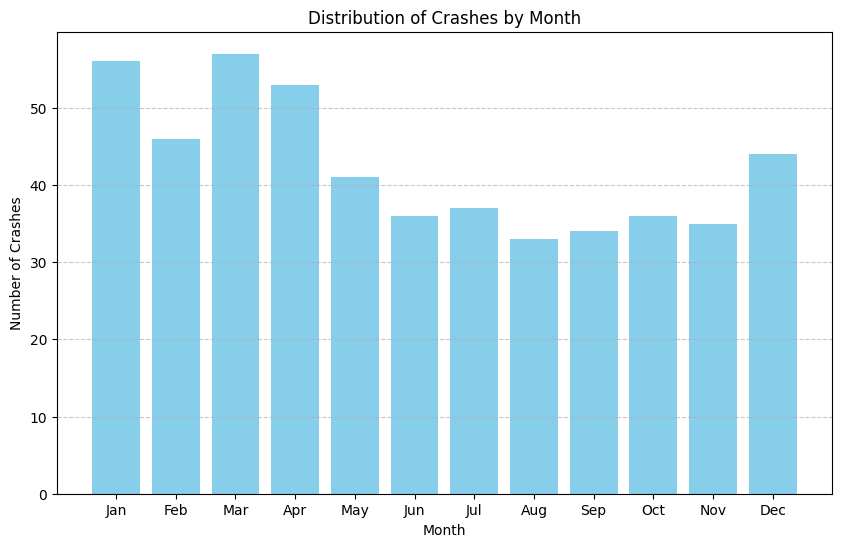

In [93]:
# Calculate the count of crashes per month
month_counts = df['Crash Month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(month_counts.index, month_counts.values, color='skyblue')  # You can choose any color you like
plt.xlabel('Month')  # Label for the x-axis
plt.ylabel('Number of Crashes')  # Label for the y-axis
plt.title('Distribution of Crashes by Month')  # Title of the plot
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Setting the x-axis ticks to show month names
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a grid for better readability; customize as needed
plt.show()

### 12) Crash Severity Distribution

Verify that most crashes are minor, reflecting typical crash severity distribution.

In [92]:
severity_counts = df['Crash Severity'].value_counts(normalize=True)
if severity_counts.get('Minor', 0) > 0.5:
    print("Minor crashes should constitute more than half of all crashes.")

# Examining Missing Data Per Records Section

Page xvii.

Section I - CRASH LEVEL:
 * records information that is common to a given crash, such as the hour the crash occurred, its location, collision type, crash classification, weather conditions, investigation, etc.

Section II - VEHICLE LEVEL:
* records information specific to each vehicle involved in the crash, such as vehicle type, direction of travel, action, errors, causes, events, etc.

Section III - PARTICIPANT LEVEL:
* records information specific to persons involved in the crash, such as participant type, sex, age, injury severity, etc. Participant records are created only for drivers, injured passengers, child passengers age 0 – 4 (whether injured or un-injured), and non-motorists who were struck. Records are not created for uninjured passengers or non-motorists (i.e. pedestrians, pedalcyclists) who were involved but not struck.

Separate by `Record Type`, the remove all columns that have over 99.999% null values.

In [20]:
pct_missing = 0.001
rec1_df = df[df['Record Type']==1].dropna(thresh=df.shape[0]*pct_missing,axis=1)
rec2_df = df[df['Record Type']==2].dropna(thresh=df.shape[0]*pct_missing,axis=1)
rec3_df = df[df['Record Type']==3].dropna(thresh=df.shape[0]*pct_missing,axis=1)

## Splitting the Datasets

In [21]:
print(rec1_df.shape)
print(rec2_df.shape)
print(rec3_df.shape)

(508, 93)
(1015, 24)
(1216, 33)


### Information on the Crash

In [22]:
missing_data(rec1_df)

,missing_count,missing_pct
column,,
Crash Level Hit & Run Flag,1,0.20
Speed Involved Flag,1,0.20
Direction From Intersection,12,2.36
Special Jurisdiction,100,19.69
Jurisdiction Group,100,19.69
Street Number,100,19.69
Drugs Involved Flag,102,20.08
Road Character,235,46.26
Driveway Related Flag,235,46.26


In [23]:
rec1_df.head()

,Crash ID,Record Type,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,Milepoint,Posted Speed Limit,Road Character,Off Roadway Flag,Intersection Type,Intersection Related Flag,Roundabout Flag,Driveway Related Flag,Number of Lanes,Number of Turning Legs,Median Type,Impact Location,Crash Type,Collision Type,Crash Severity,Weather Condition,Road Surface Condition,Light Condition,Traffic Control Device (TCD),TCD Functional Flag,Investigating Agency,Crash Level Event 1 Code,Crash Level Event 2 Code,Crash Level Event 3 Code,Crash Level Cause 1 Code,Crash Level Cause 2 Code,Crash Level Cause 3 Code,School Zone Indicator,Work Zone Indicator,Secondary Crash Indicator,Alcohol-Involved Flag,Drugs Involved Flag,Crash Marijuana Involved Flag,Speed Involved Flag,Crash Level Hit & Run Flag,Population Range Code,Road Control,Route Type,Region ID,District ID,Segment Marker ID,Segment Point LRS Measure,Unlocatable Flag,Total Vehicle Count,Total Fatality Count,Total Suspected Serious Injury (A) Count,Total Suspected Minor Injury (B) Count,Total Possible Injury (C) Count,Total Non-Fatal Injury Count,Total Un-Injured Children Age 00-04,Total Un-Injured Persons,Total Pedestrian Count,Total Pedestrian Fatality Count,Total Pedestrian Non-Fatal Injury Count,Total Pedalcyclist Count,Total Pedalcyclist Fatality Count,Total Pedalcyclist Non-Fatal Injury Count,Total Unknown Non-Motorist Count,Total Unknown Non-Motorist Fatality Count,Total Unknown Non-Motorist Injury Count,Total Vehicle Occupant Count
0,1809119,1,99992.0,3.0,14.0,2019.0,5.0,14.0,26.0,0.0,57.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,27.0,40.62,-122.0,22.0,59.23,0.0,NaN,NaN,NaN,9.0,16.77,55.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,NaN,2.0,B,6,2.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,8.0,US,26.0,1.0,02C,293_10835,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,1.0
5,1809229,1,2405.0,3.0,3.0,2019.0,1.0,2.0,3.0,185.0,68.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,24.0,20.47,-122.0,17.0,37.30,0.0,1504.0,426,1.0,4.0,22.59,50.0,3.0,0.0,NaN,0.0,0.0,0.0,4.0,NaN,1.0,0.0,3,0,2.0,1.0,1.0,3.0,0.0,1.0,3.0,NaN,NaN,NaN,18.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,US,26.0,1.0,02C,293_8495,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
9,1809637,1,1811.0,5.0,17.0,2019.0,6.0,99.0,3.0,0.0,0.0,2.0,1.0,26.0,1.0,6.0,0.0,1.0,0026BG100S00,45.0,17.0,0.84,-121.0,42.0,58.38,0.0,NaN,NaN,NaN,0.0,57.56,55.0,7.0,1.0,NaN,0.0,0.0,0.0,1.0,NaN,0.0,5.0,8,9,2.0,2.0,1.0,1.0,99.0,1.0,1.0,62.0,10.0,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,5.0,NaN,NaN,1.0,02C,293_6389,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
12,1810874,1,99981.0,4.0,7.0,2019.0,1.0,0.0,26.0,245.0,57.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,29.0,50.60,-122.0,33.0,59.51,0.0,1940.0,9715,1.0,7.0,5.69,35.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,6.0,3,0,2.0,3.0,2.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN,4.0,19.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,9.0,2.0,US,26.0,1.0,02B,293_12196,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
16,1812266,1,5970.0,7.0,8.0,2019.0,2.0,14.0,26.0,245.0,57.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,29.0,52.99,-122.0,30.0,38.24,0.0,1940.0,5148,1.0,9.0,8.55,35.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,B,1,2.0,1.0,1.0,1.0,1.0,1.0,3.0,NaN,NaN,NaN,4.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,9.0,2.0,US,26.0,1.0,02B,293_18831,0.0,4.0,2.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0

### Information on the Vehicle

In [24]:
missing_data(rec2_df)

,missing_count,missing_pct
column,,
Vehicle Ownership Code,18,1.77
Vehicle Action Code,878,86.50
Vehicle Cause 1 Code,977,96.26
Vehicle Cause 2 Code,1000,98.52


In [25]:
rec2_df.head()

,Crash ID,Record Type,Vehicle ID,Vehicle Coded Seq#,Total Count of Persons Involved,Total Persons Using Safety Equipment,Total Persons Not Using Safety Equipment,Total Persons Safety Equipment Use Unknown,Vehicle Ownership Code,Vehicle Special Use Code,Vehicle Type Code,Emergency Use Flag,Number of Trailers,Vehicle Movement Code,Vehicle Action Code,Vehicle Cause 1 Code,Vehicle Cause 2 Code,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity
1,1809119,2,3409578.0,1.0,1.0,0.0,9.0,0.0,0.0,1.0,3.0,7.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1809119,2,3409579.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,3.0,15.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,2.0,0.0
6,1809229,2,3409765.0,1.0,1.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
10,1809637,2,3410470.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,7.0,0.0,0.0,62.0,10.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
13,1810874,2,3412622.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,7.0,3.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0


### Information on the people

In [26]:
missing_data(rec3_df)

,missing_count,missing_pct
column,,
Age,20,1.64
Vehicle Coded Seq#,24,1.97
Participant Hit & Run Flag,209,17.19
Public Employee Flag,209,17.19
Driver License Status,588,48.36
Participant Event 1 Code,855,70.31
Participant Event 2 Code,871,71.63
Non-Motorist Travel Direction To,1080,88.82
Participant Cause 3 Code,1086,89.31


In [27]:
rec3_df.head()

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence Status,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,20.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,47.0,NaN,NaN,1.0,NaN,NaN,NaN,0.0,9.0,0.0,0.0
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,66.0,1.0,1.0,9.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,9.0,9.0,0.0
7,1809229,3,3409765.0,3888073.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,41.0,2.0,4.0,9.0,2.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
8,1809229,3,0.0,3888074.0,2.0,NaN,1.0,3.0,0.0,0.0,2.0,32.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,50.0,70.0,NaN,NaN,18.0,NaN,NaN,NaN,0.0,9.0,1.0,0.0
11,1809637,3,3410470.0,3888766.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,90.0,2.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,47.0,81.0,NaN,1.0,NaN,NaN,NaN,0.0,9.0,0.0,0.0


## Merge On Crash ID

In [28]:
print(rec1_df.shape)
print(rec2_df.shape)
print(rec3_df.shape)

(508, 93)
(1015, 24)
(1216, 33)


In [29]:
df1 = rec1_df.merge(rec2_df, how="inner", on="Crash ID")
df2 = rec3_df.merge(df1, how="inner", on="Crash ID")

In [30]:
print(df1.shape)
print(df2.shape)

(1015, 116)
(2598, 148)


In [31]:
missing_data(df2)

,missing_count,missing_pct
column,,
Crash Level Hit & Run Flag,1,0.04
Speed Involved Flag,1,0.04
Age,21,0.81
Vehicle Coded Seq#_x,25,0.96
Vehicle Ownership Code,43,1.66
Direction From Intersection,50,1.92
Participant Hit & Run Flag,432,16.63
Public Employee Flag,432,16.63
Street Number,461,17.74


In [32]:
print(df2.drop_duplicates(subset=['Crash ID']).shape)

(508, 148)


# Redoing Assertions

## Redoing Assertion #5

In [33]:
pd.DataFrame(df2.value_counts(['Vehicle Exceeded Posted Speed Flag', 'Crash Marijuana Involved Flag'], sort=False))

count
Vehicle Exceeded Posted Speed Flag Crash Marijuana Involved Flag       
0.0                                2.0                             1016
                                   4.0                              293
                                   5.0                              356
                                   8.0                               80
1.0                                2.0                              683
                                   4.0                               70
                                   5.0                               21
                                   8.0                               14
2.0                                2.0                               50
                                   4.0                                1
3.0                                2.0                                4
4.0                                2.0                               10

In [34]:
pd.DataFrame(df2.value_counts(['Vehicle Exceeded Posted Speed Flag', 'Drugs Involved Flag'], sort=False))

count
Vehicle Exceeded Posted Speed Flag Drugs Involved Flag       
0.0                                5.0                    268
                                   8.0                     25
                                   9.0                   1016
1.0                                5.0                     53
                                   8.0                     17
                                   9.0                    683
2.0                                5.0                      1
                                   9.0                     50
3.0                                9.0                      4
4.0                                9.0                     10

In [35]:
pd.DataFrame(df2.value_counts(['Alcohol-Involved Flag', 'Vehicle Exceeded Posted Speed Flag'], sort=False))

count
Alcohol-Involved Flag Vehicle Exceeded Posted Speed Flag       
0.0                   0.0                                  1661
                      1.0                                   667
                      2.0                                    34
                      4.0                                    10
1.0                   0.0                                    84
                      1.0                                   121
                      2.0                                    17
                      3.0                                     4